## Аналитика в авиации

Для анализа представлены данные о компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

#### Шаг 4. Аналитика средствами Python

In [1]:
# импорт неоходимых библиотек
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

In [11]:
plane=pd.read_csv('/datasets/query_1.csv') # импортирование файлов
plane.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [12]:
cities=pd.read_csv('/datasets/query_3.csv')
cities['average_flights'] = cities['average_flights'].round().astype(int) # округлим значения до целых и изменим тип данных
cities.head(10)

,city,average_flights
0,Абакан,4
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2
5,Барнаул,3
6,Белгород,6
7,Белоярский,2
8,Благовещенск,1
9,Братск,1


In [3]:
plane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


Для изучения были представлены две таблицы. Первая таблица сохранена в датафрейм - plane. Данная таблица включает информацию о моделях самолетов и количестве рейсов для каждой модели в сентябре 2018 года.

Вторая таблица сохранена в датафрейм cities, она содержит информацию о городе и среднем количестве рейсов, прибывающих в город. Для удобства исчисления значения в столбце с количеством рейсов округлены до целого значения, заменив тип данных на целочисленный.

### Построение графиков

Построение графика для 10 самых популярных направлений.

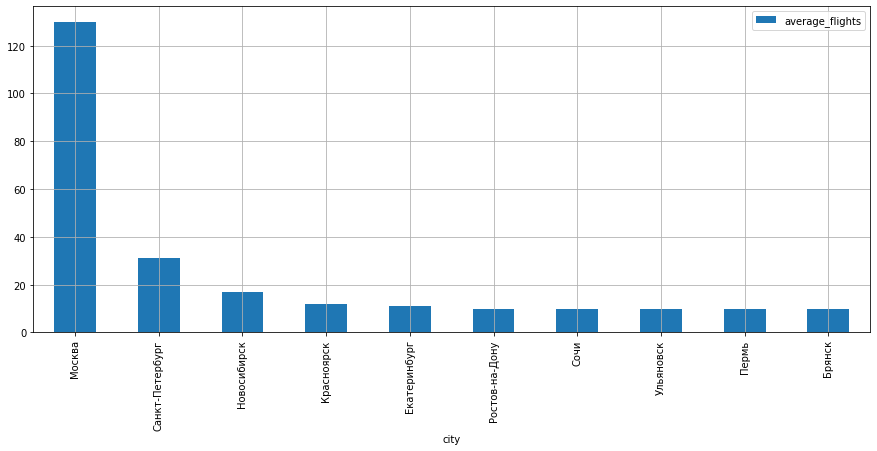

In [5]:
(cities
 .sort_values(by='average_flights', ascending=False)
 .head(10)                                                # получаем топ 10 городов по популярности рейсов
 .reset_index(drop=True)
 .plot(x='city', y='average_flights', figsize=(15,6), kind='bar', grid=True))

Получив информацию о десяти самый популярных направлениях было определено, что:
1. Самым популярным направлением является Москва - это обосновано не только тем, что Москва самый густонаселенный город России, но это и крупные пересадочный хаб. Многие люди летят в города назначения с пересадкой в Москве, причем как в города России, так и зарубежные. Поскольку представленная информация не позволяет выделить тех, для кого Москва - конечная цель назначения, то необходимо принять, что ее отрыв от других городов разителен.
2. Вторым по популярности аэропортов назначения является Санкт-Петербург. Второй по размеры и второй по популярности.
3. Города с третьего места по 10 - имею примерно равные показатели о числе рейсов (в районе 10 рейсов в день). В основном это крупные города регионов, или туристические (Сочи). Очевидно, что, если бы статистика была за лето, города юга России скорее всего были бы на более высоких местах.

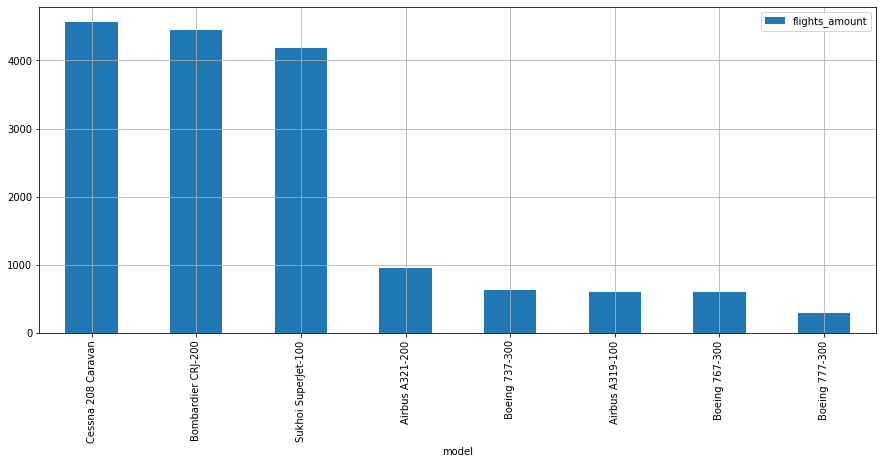

In [6]:
(plane
 .sort_values(by='flights_amount', ascending=False)
 .plot(x='model', y='flights_amount', figsize=(15,6), kind='bar', grid=True))

Больше всего рейсов совершают самолеты Bombardier CRJ-200 (4446), Cessna 208 Caravan (4557), Sukhoi SuperJet-100 (4185). Их отличия незначительны. Самолетый компаний Airbus и Boeing пользуются меньшей популярностью. Возможно, что их количество в авиапарке F9 незначительно.

(0, 15)

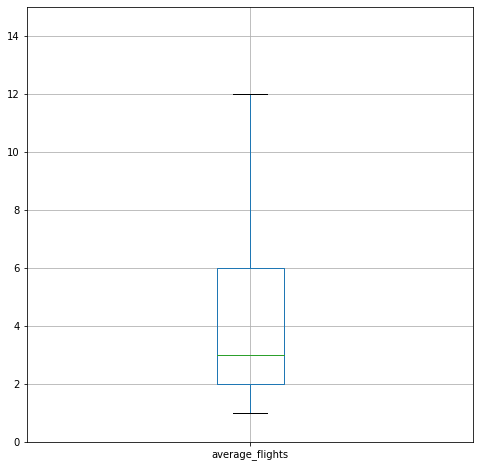

In [7]:
(cities
 .sort_values(by='average_flights', ascending=False)
 .boxplot(figsize=(8,8)))
plt.ylim(0, 15)

Поскольку целесообразность построения графика по популярности тех или иных городов нецелесообразно и было проделано ранее, был построе график для определения нормальных значений и выбросов.

Так, исходя из графика видно, что нормальное значение среднего числа полетов в день в сентябре 2018 года составлялоот 1 до 12 прилетов. Среднее значение - 3 прилета в день в каждый город. С учетом ранее полученной информации о топ 10 городах видно, что они число полетов в такие города скорее относятся к выбросам.

#### Шаг 5. Проверка гипотезы средствами Python

Необходимо проверить гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».
- Нулевая гипотеза (H₀) - "Средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время". H₀ всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти.

- Альтернативная гипотеза (H₁) - "Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время".

In [8]:
tickets =pd.read_csv('/datasets/query_last.csv')
festival = tickets.pivot_table(index='festival_name', values='ticket_amount') # датасет о проданных билетах в дни фестиваля
other = (tickets
        .query('week_number not in (30, 31, 36)').reset_index(drop=True)
        .pivot_table(index='week_number', values='ticket_amount'))            # датасет о проданных билетах в обычное время

In [9]:
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha = .05

results = st.ttest_ind(other, festival)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: в дни фестиваля и в обычное время спрос отличается")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время")

p-значение: [0.09688869]
Не получилось отвергнуть нулевую гипотезу: средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время


По результатам изучения выборки и проверки гипотезы не получилось отвергнуть нулевую гипотезу: средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. Полученное значение p-value: 0.09688869. Хотя мы исходя из такого значения не можем автоматически отвергуть нулевую гипотезу, ее автоматиеское принятие также затруднительно. 

Полученное значение говорит о том, что с учетом небольшого объема выборок, не достаточно информации, чтобы отвергнуть нулевую гипотезу, хотя возможно, что средний спрос на авиабилеты в дни фестиваля и обычное время отличается и это было бы видно на большей выборке или при анализе с учетом иных параметров.

Другими словами, существует 9% шанс, что наблюдаемые нами результаты просто случайность.

## Вывод

По результатам изучения представленных для анализа файлов в части прогнозирования поведения пассажиров можно акцентировать рекламную компанию и обратить особое внимание на следующее (с учетом информации о совершенных рейсах в сентябре 2018):
1. Большая часть рейсов совершается в Москву и Санкт-Петербург. Также в десятку самых популярных направлений входят - Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Сочи, Ульяновск, Пермь, Брянск.
2. Больше всего рейсов совершили самолеты Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100. Самолеты компаний Airbus и Boeing пользуются меньшей популярностью, хотя возможно, что их количество в авиапарке F9 незначительно.
3. По результатам изучения выборки было получено, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. Полученное значение говорит о том, что с учетом небольшого объема выборок, не достаточно информации, чтобы отвергнуть нулевую гипотезу, хотя возможно, что средний спрос на авиабилеты в дни фестиваля и обычное время отличается и это было бы видно на большей выборке или при анализе с учетом иных параметров. Другими словами, существует 9% шанс, что наблюдаемые нами результаты просто случайность. Для более точной информации необходимо изучение выборки большего объема.